In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
#c = ['#cbc0d3', '#efd3d7', '#feeafa', '#dee2ff', '#8e9aaf']
c = ['#f72585', '#7209b7', '#4cc9f0', '#4361ee', '#3a0ca3']

In [3]:
df_bcn = pd.read_csv('data/listings_Barcelona.csv')

In [4]:
df_bcn.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13977576,https://www.airbnb.com/rooms/13977576,20230314070701,2023-03-14,previous scrape,Habitación individual es Barcelona,Mi alojamiento es bueno para aventureros y via...,NaN,https://a0.muscache.com/pictures/7a6e9767-bd4e...,64903899,...,NaN,NaN,NaN,NaN,f,1,0,1,0,0.01
1,42105584,https://www.airbnb.com/rooms/42105584,20230314070701,2023-03-14,previous scrape,Habitación M&D,<b>License number</b><br />Exempt,NaN,https://a0.muscache.com/pictures/7342e586-6ea5...,333969184,...,NaN,NaN,NaN,Exempt,f,1,0,1,0,NaN


In [5]:
df_bcn.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

#### Categorizing the hosts

Hosts will be categorized based on the number of accomodation their offer:
- 1 liting
- 2-4 listings
- 4-10 listings
- more than 10 listings

In [6]:
conditions = [
    (df_bcn['calculated_host_listings_count'] == 1),
    (df_bcn['calculated_host_listings_count'] > 1) & (df_bcn['calculated_host_listings_count'] < 4),
    (df_bcn['calculated_host_listings_count'] > 3) & (df_bcn['calculated_host_listings_count'] < 11),
    (df_bcn['calculated_host_listings_count'] > 10)
    ]

In [7]:
values = ['single_listing', '2-3_listings', '4-10_listings', 'above_10']

In [8]:
df_bcn['host_type'] = np.select(conditions, values)

In [9]:
df_bcn['city'] = 'BCN'

In [10]:
df_bcn_part = df_bcn[['id', 'host_id', 'room_type', 'price', 'minimum_nights', 'host_type', 'city']]

In [11]:
df_bcn_part.head()

,id,host_id,room_type,price,minimum_nights,host_type,city
0,13977576,64903899,Private room,$12.00,1,single_listing,BCN
1,42105584,333969184,Private room,$25.00,2,single_listing,BCN
2,33727898,251710733,Entire home/apt,$300.00,4,4-10_listings,BCN
3,44995311,363074093,Private room,$83.00,1,4-10_listings,BCN
4,15763812,101927904,Private room,$38.00,2,single_listing,BCN


In [12]:
df_bcn_part['price'] = df_bcn_part['price'].str[1:]

In [13]:
df_bcn_part['price'] = df_bcn_part['price'].str.replace(',', '')

In [14]:
df_bcn_part['price'] = pd.to_numeric(df_bcn_part['price'])

In [15]:
df_sthlm = pd.read_csv('data/listings_Stockholm.csv')

In [16]:
df_sthlm.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,75590,https://www.airbnb.com/rooms/75590,20221229235426,2022-12-30,city scrape,Amazing nature location by a lake,"Apartment on the top floor, overlooking a lake...","Expect a wonderful stay in beautiful scenery, ...",https://a0.muscache.com/pictures/7430cc80-7a4f...,397766,...,5.00,4.78,4.78,NaN,f,1,1,0,0,0.09
1,164448,https://www.airbnb.com/rooms/164448,20221229235426,2022-12-30,city scrape,Double room in central Stockholm with Wi-Fi,I am renting out a nice double room on the top...,NaN,https://a0.muscache.com/pictures/1101571/13429...,784312,...,4.97,4.83,4.76,NaN,t,2,0,2,0,2.55


In [17]:
conditions = [
    (df_sthlm['calculated_host_listings_count'] == 1),
    (df_sthlm['calculated_host_listings_count'] > 1) & (df_sthlm['calculated_host_listings_count'] < 4),
    (df_sthlm['calculated_host_listings_count'] > 3) & (df_sthlm['calculated_host_listings_count'] < 11),
    (df_sthlm['calculated_host_listings_count'] > 10)
    ]

In [18]:
df_sthlm['host_type'] = np.select(conditions, values)

In [19]:
df_sthlm['city'] = 'STHLM'

In [20]:
df_sthlm_part = df_sthlm[['id', 'host_id', 'room_type', 'price', 'minimum_nights', 'host_type', 'city']]

In [21]:
df_sthlm_part.head()

,id,host_id,room_type,price,minimum_nights,host_type,city
0,75590,397766,Entire home/apt,$949.00,30,single_listing,STHLM
1,164448,784312,Private room,$864.00,3,2-3_listings,STHLM
2,170651,814021,Entire home/apt,"$1,055.00",4,single_listing,STHLM
3,206221,1022374,Shared room,$669.00,3,single_listing,STHLM
4,208366,993889,Entire home/apt,$829.00,3,single_listing,STHLM


In [22]:
df_sthlm_part['price'] = df_sthlm_part['price'].str[1:]


In [23]:
df_sthlm_part['price'] = df_sthlm_part['price'].str.replace(',', '')

In [24]:
df_sthlm_part['price'] = pd.to_numeric(df_sthlm_part['price'])

In [25]:
df_sthlm_part['price'] = df_sthlm_part['price']* 0.0883

In [26]:
df_sthlm_part.head()

,id,host_id,room_type,price,minimum_nights,host_type,city
0,75590,397766,Entire home/apt,83.7967,30,single_listing,STHLM
1,164448,784312,Private room,76.2912,3,2-3_listings,STHLM
2,170651,814021,Entire home/apt,93.1565,4,single_listing,STHLM
3,206221,1022374,Shared room,59.0727,3,single_listing,STHLM
4,208366,993889,Entire home/apt,73.2007,3,single_listing,STHLM


In [27]:
df_rome = pd.read_csv('data/listings_Rome.csv')

In [28]:
df_rome.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,256695,https://www.airbnb.com/rooms/256695,20230315024350,2023-03-15,city scrape,Trastevere color-suite,<b>The space</b><br />Apartment totally new in...,NaN,https://a0.muscache.com/pictures/4543522/a51fe...,1350540,...,4.99,4.95,4.91,NaN,t,1,1,0,0,1.54
1,258330,https://www.airbnb.com/rooms/258330,20230315024350,2023-03-15,city scrape,"Sunny with view, WiFi, A/C. Metro, Airport train.","Naturally lit apartment with Wi-Fi, flat-scree...",The apartment is located in the Tuscolano-San ...,https://a0.muscache.com/pictures/b6804ab8-3bc6...,1358462,...,4.99,4.60,4.75,NaN,t,1,1,0,0,0.55


In [29]:
conditions = [
    (df_rome['calculated_host_listings_count'] == 1),
    (df_rome['calculated_host_listings_count'] > 1) & (df_rome['calculated_host_listings_count'] < 4),
    (df_rome['calculated_host_listings_count'] > 3) & (df_rome['calculated_host_listings_count'] < 11),
    (df_rome['calculated_host_listings_count'] > 10)
    ]

In [30]:
df_rome['host_type'] = np.select(conditions, values)

In [31]:
df_rome['city'] = 'ROM'

In [32]:
df_rome_part = df_rome[['id', 'host_id', 'room_type', 'price', 'minimum_nights', 'host_type', 'city']]

In [33]:
df_rome_part.head()

,id,host_id,room_type,price,minimum_nights,host_type,city
0,256695,1350540,Entire home/apt,$124.00,3,single_listing,ROM
1,258330,1358462,Entire home/apt,$80.00,3,single_listing,ROM
2,137044,670337,Entire home/apt,$216.00,3,single_listing,ROM
3,137157,486866,Entire home/apt,$175.00,3,4-10_listings,ROM
4,259075,1311777,Entire home/apt,$202.00,3,2-3_listings,ROM


In [34]:
df_rome_part['price'] = df_rome_part['price'].str[1:]

In [35]:
df_rome_part['price'] = df_rome_part['price'].str.replace(',', '')

In [36]:
df_rome_part['price'] = pd.to_numeric(df_rome_part['price'])

In [37]:
df_3 = pd.concat([df_bcn_part, df_sthlm_part, df_rome_part], axis=0)

In [38]:
df_3.city.unique()

array(['BCN', 'STHLM', 'ROM'], dtype=object)

In [39]:
df_3.room_type.unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [40]:
df_3.groupby(['city', 'room_type']).room_type.count() 

city   room_type      
BCN    Entire home/apt     9463
       Hotel room           149
       Private room        5887
       Shared room          156
ROM    Entire home/apt    17092
       Hotel room           686
       Private room        6979
       Shared room          167
STHLM  Entire home/apt     2618
       Hotel room            35
       Private room         646
       Shared room           40
Name: room_type, dtype: int64

### Figure 1: Number of different types of accomodation offered in the three cities

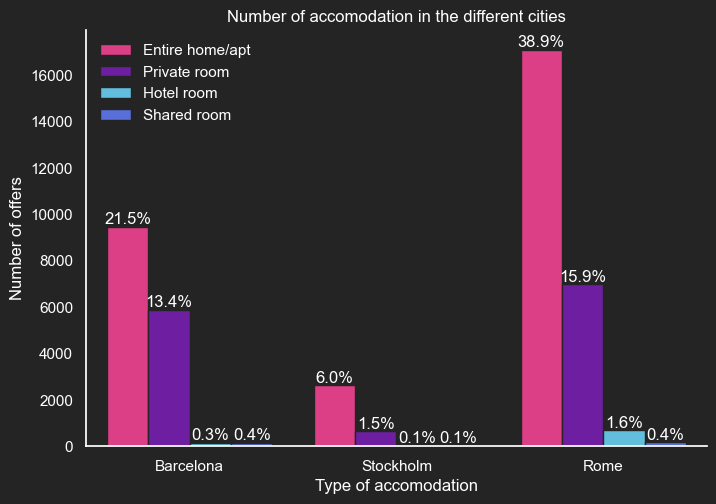

In [41]:

# set the background color to #242424 
sns.set(rc={'axes.facecolor':'#242424', 'figure.facecolor':'#242424'})

# plot the data with a categorical plot
g = sns.catplot(data=df_3, kind='count', x= 'city', hue = 'room_type',  legend = '', palette = c, edgecolor = "#242424", hue_order=['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'])
titel = plt.title('Number of accomodation in the different cities')
legend = plt.legend(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'], loc=2, frameon=False)   
for text in legend.get_texts():
    text.set_color("white")

# change axes labels and ticks to white    
xlabel = plt.xlabel('Type of accomodation')
ylabel = plt.ylabel('Number of offers')

xlabel.set_color("white")
ylabel.set_color("white")

xtick = plt.xticks(rotation=0, color='white')
g.set_xticklabels(['Barcelona','Stockholm','Rome'])
ytick = plt.yticks(color="white")

titel.set_color("white")

# iterate through axes
#for ax in g.axes.ravel():
    #labels = [1,2,3,4,5,6,7,8,9,10,11,12]
    # add annotations to all bars on the graph
#    for label in ax.containers:
 #       ax.bar_label(label, label_type='edge', color = "white")
  #      ax.margins(y=0.2)  

#for container in ax.containers:
#    ax.bar_label(container, fmt='%.1f')    
    
for ax in g.axes.ravel():    
    # add annotations
    for ca in ax.containers:

        #custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{h/df_3.room_type.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in ca]

        ax.bar_label(ca, labels=labels, label_type='edge', color ="white")
        
        
# Turns off grid on the left Axis.
ax.grid(False)

# set figure size in inches   
g.fig.set_size_inches(8,5);

### Figure 1b: Number of different types of accomodation (stacked plot)

In [42]:
# aggregate data for the stacked plot

plot = df_3.groupby(['city'])['room_type'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

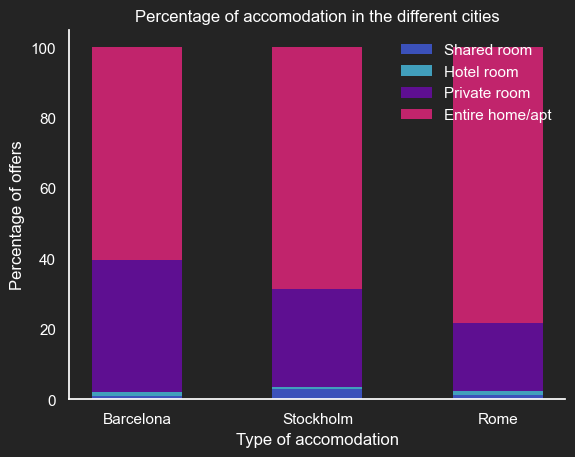

In [43]:
# set the background color to #242424 
sns.set(rc={'axes.facecolor':'#242424', 'figure.facecolor':'#242424'})

# plot the data with a categorical plot
g = sns.histplot(x = 'city' , hue = 'room_type', stat='count', weights= 'percentage', multiple = 'stack', data = plot, legend = '', palette = c, shrink = 0.5, edgecolor = "none")
titel = plt.title('Percentage of accomodation in the different cities')
legend = plt.legend(['Shared room', 'Hotel room', 'Private room', 'Entire home/apt'], loc=0, frameon=False)   
for text in legend.get_texts():
    text.set_color("white")

for bars in ax.containers:
    heights = [b.get_height() for b in bars]
    labels = [f'{h * 100:.1f}%' if h > 0.001 else '' for h in heights]
    ax.bar_label(bars, labels=labels, label_type='center')
    
# change axes labels and ticks to white    
xlabel = plt.xlabel('Type of accomodation')
ylabel = plt.ylabel('Percentage of offers')

xlabel.set_color("white")
ylabel.set_color("white")

xtick = plt.xticks(rotation=0, color='white')
g.set_xticklabels(['Barcelona','Stockholm','Rome'])
ytick = plt.yticks(color="white")

titel.set_color("white")

# Turns off grid on the left Axis.
g.grid(False)

# set figure size in inches   
#g.ax.fig.set_size_inches(8,5);
sns.despine();


### Figure 1c - with % on axis y

In [44]:
new_df = df_3.groupby('city')['room_type'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

In [45]:
new_df

,city,room_type,Percent
0,BCN,Entire home/apt,60.447141
1,BCN,Private room,37.604599
2,BCN,Shared room,0.996487
3,BCN,Hotel room,0.951773
4,ROM,Entire home/apt,68.576472
5,ROM,Private room,28.001123
6,ROM,Hotel room,2.752367
7,ROM,Shared room,0.670037
8,STHLM,Entire home/apt,78.406709
9,STHLM,Private room,19.347110


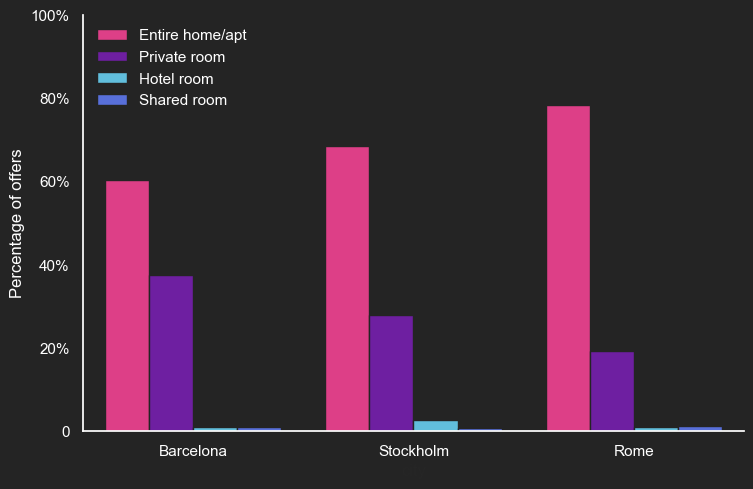

In [46]:

# set the background color to #242424 
sns.set(rc={'axes.facecolor':'#242424', 'figure.facecolor':'#242424'})

# plot the data with a categorical plot
g = sns.catplot(data=new_df, kind='bar', x='city', y= 'Percent', hue='room_type', legend = False, palette = c, edgecolor = "#242424", hue_order=['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'])

g.ax.set_ylim(0,100)

#titel = plt.title('Percentage of accomodation type in the different cities')
plt.legend(labelcolor='white', edgecolor = 'none', loc='upper left')  


# change axes labels and ticks to white    
#xlabel = plt.xlabel('Location')
ylabel = plt.ylabel('Percentage of offers')

xlabel.set_color("white")
ylabel.set_color("white")

xtick = plt.xticks(rotation=0, color='white')
g.set_xticklabels(['Barcelona','Stockholm','Rome'])
ytick = plt.yticks(color="white")
g.set_yticklabels(['0','20%','40%','60%','80%','100%'])

titel.set_color("white")

      
# Turns off grid on the left Axis.
ax.grid(False)
g.ax.yaxis.grid(False)
sns.despine()

# set figure size in inches   
g.fig.set_size_inches(8,5);

#### Version with hue function

In [47]:
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12, color = 'white')

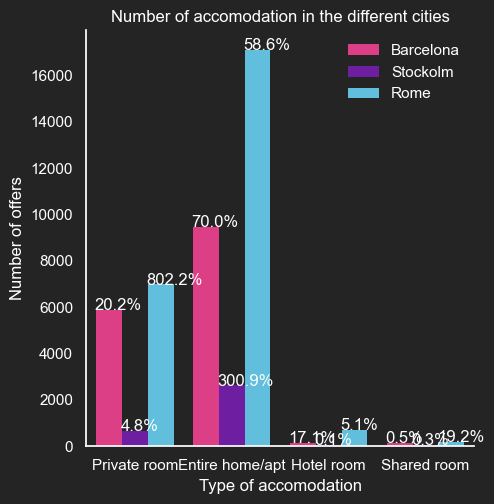

In [48]:
# set the background color to #242424 
sns.set(rc={'axes.facecolor':'#242424', 'figure.facecolor':'#242424'})

# plot the data with a categorical plot
g = sns.catplot(data=df_3, kind='count', x= 'room_type', hue = 'city',  legend = '', palette = c, edgecolor = "none")

#ax = sns.countplot(x = 'city', hue = 'room_type', data = df_3)
titel = plt.title('Number of accomodation in the different cities')
legend = plt.legend(['Barcelona','Stockolm','Rome'], loc=0, frameon=False)   
for text in legend.get_texts():
    text.set_color("white")

# change axes labels and ticks to white    
xlabel = plt.xlabel('Type of accomodation')
ylabel = plt.ylabel('Number of offers')

xlabel.set_color("white")
ylabel.set_color("white")

xtick = plt.xticks(rotation=0, color='white')
#g.ax.set_xticklabels(['Barcelona','Stockholm','Rome'])
ytick = plt.yticks(color="white")

titel.set_color("white")

# Turns off grid on the left Axis.
g.ax.grid(False)

with_hue(g.ax, df_3.room_type, 3, 4)

### Figure 2: Host types in the three cities

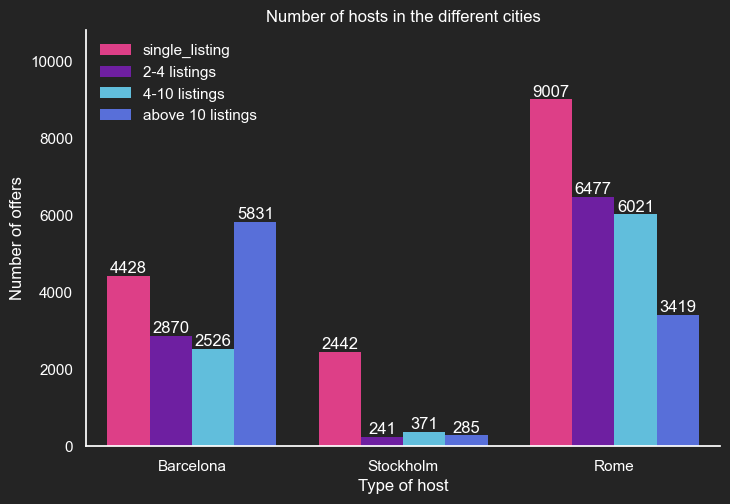

In [49]:
# set the background color to #242424 
sns.set(rc={'axes.facecolor':'#242424', 'figure.facecolor':'#242424'})

# plot the data with a categorical plot
g = sns.catplot(data=df_3, kind='count', x= 'city', hue = 'host_type',  legend = '', palette = c, edgecolor = 'none')
titel = plt.title('Number of hosts in the different cities')
legend = plt.legend(['single_listing', '2-4 listings', '4-10 listings', 'above 10 listings'], loc=2, frameon=False)   
for text in legend.get_texts():
    text.set_color("white")

# change axes labels and ticks to white    
xlabel = plt.xlabel('Type of host')
ylabel = plt.ylabel('Number of offers')

xlabel.set_color("white")
ylabel.set_color("white")

xtick = plt.xticks(rotation=0, color='white')
g.set_xticklabels(['Barcelona','Stockholm','Rome'])
ytick = plt.yticks(color="white")

titel.set_color("white")

# iterate through axes
for ax in g.axes.ravel():
    
    # add annotations to all bars on the graph
    for label in ax.containers:
        # add custom labels with the labels=labels parameter if needed
        #labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(label, label_type='edge', color = "white")
    ax.margins(y=0.2)  

# Turns off grid on the left Axis.
ax.grid(False)

# set figure size in inches   
g.fig.set_size_inches(8,5);


### Figure 2b - with % on axis y

In [50]:
new_df2 = df_3.groupby('city')['host_type'].value_counts(normalize=True)
new_df2 = new_df2.mul(100).rename('Percent').reset_index()

In [51]:
new_df2

,city,host_type,Percent
0,BCN,above_10,37.246886
1,BCN,single_listing,28.284893
2,BCN,4-10_listings,18.332801
3,BCN,2-3_listings,16.135420
4,ROM,single_listing,36.137859
5,ROM,4-10_listings,25.987000
6,ROM,2-3_listings,24.157439
7,ROM,above_10,13.717702
8,STHLM,single_listing,73.135669
9,STHLM,2-3_listings,11.111111


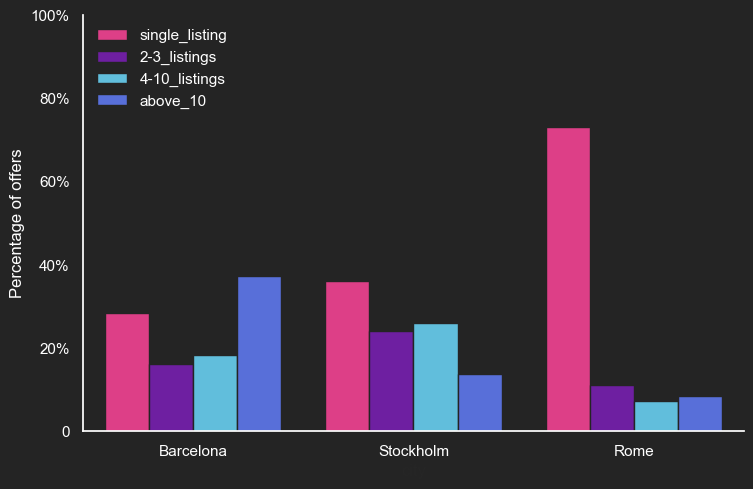

In [52]:
# set the background color to #242424 
sns.set(rc={'axes.facecolor':'#242424', 'figure.facecolor':'#242424'})

# plot the data with a categorical plot
g = sns.catplot(data=new_df2, kind='bar', x='city', y= 'Percent', hue='host_type', legend = False, palette = c, edgecolor = "#242424", hue_order=['single_listing', '2-3_listings', '4-10_listings', 'above_10'])

g.ax.set_ylim(0,100)

#titel = plt.title('Percentage of host types in the different cities')
plt.legend(labelcolor='white', edgecolor = 'none', loc='upper left')  

#legend = plt.legend(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'], loc=2, frameon=False)   
#for text in legend.get_texts():
#    text.set_color("white")

# change axes labels and ticks to white    
#xlabel = plt.xlabel('Location')
ylabel = plt.ylabel('Percentage of offers')

xlabel.set_color("white")
ylabel.set_color("white")

xtick = plt.xticks(rotation=0, color='white')
g.set_xticklabels(['Barcelona','Stockholm','Rome'])
ytick = plt.yticks(color="white")
g.set_yticklabels(['0','20%','40%','60%','80%','100%'])

titel.set_color("white")

      
# Turns off grid on the left Axis.
ax.grid(False)
g.ax.yaxis.grid(False)
sns.despine()

# set figure size in inches   
g.fig.set_size_inches(8,5);

### Figure 3: Lenght of stay

In Barcelona for offering short terms accomodation (shorter than 31 day) a license is needed. However, long term offers do not need a license. 

In [53]:
df_3.columns

Index(['id', 'host_id', 'room_type', 'price', 'minimum_nights', 'host_type',
       'city'],
      dtype='object')

In [54]:
conditions = [
    (df_3['minimum_nights'] <= 31),
    (df_3['minimum_nights'] > 31),
    ]

In [55]:
values = ['short_stay', 'long_stay']

In [56]:
df_3['stay'] = np.select(conditions, values)

In [57]:
df_3.head()

,id,host_id,room_type,price,minimum_nights,host_type,city,stay
0,13977576,64903899,Private room,12.0,1,single_listing,BCN,short_stay
1,42105584,333969184,Private room,25.0,2,single_listing,BCN,short_stay
2,33727898,251710733,Entire home/apt,300.0,4,4-10_listings,BCN,short_stay
3,44995311,363074093,Private room,83.0,1,4-10_listings,BCN,short_stay
4,15763812,101927904,Private room,38.0,2,single_listing,BCN,short_stay


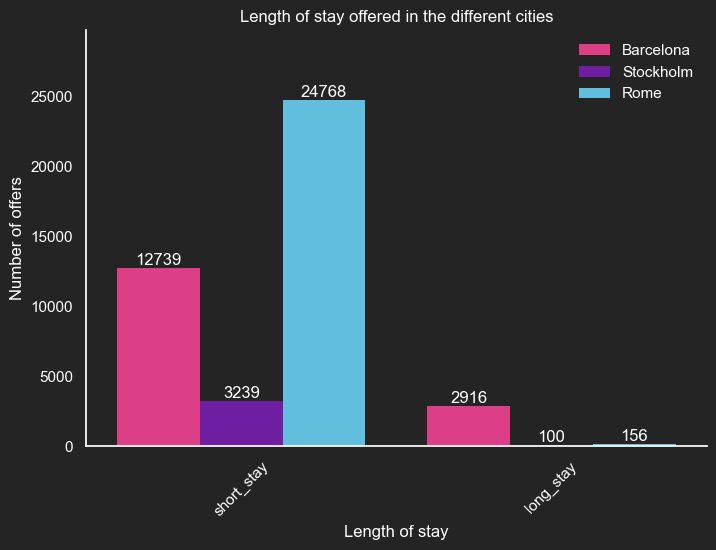

In [58]:
# set the background color to #242424 
sns.set(rc={'axes.facecolor':'#242424', 'figure.facecolor':'#242424'})

# plot the data with a categorical plot
g = sns.catplot(data=df_3, kind='count', x= 'stay', hue = 'city',  legend = '', palette = c, edgecolor = 'none')

titel = plt.title('Length of stay offered in the different cities')
legend = plt.legend(['Barcelona', 'Stockholm', 'Rome'], loc=1, frameon=False)   
for text in legend.get_texts():
    text.set_color("white")

# change axes labels and ticks to white    
xlabel = plt.xlabel('Length of stay')
ylabel = plt.ylabel('Number of offers')

xlabel.set_color("white")
ylabel.set_color("white")

xtick = plt.xticks(rotation=45, color='white')
ytick = plt.yticks(color="white")

titel.set_color("white")


# iterate through axes
for ax in g.axes.ravel():
    
    # add annotations to all bars on the graph
    for label in ax.containers:
        # add custom labels with the labels=labels parameter if needed
        # labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(label, label_type='edge', color = "white")
    ax.margins(y=0.2)  

# Turns off grid on the left Axis.
ax.grid(False)

# set figure size in inches   
g.fig.set_size_inches(8,5);

### Figure 3b - with % on the y axis

In [59]:
new_df3 = df_3.groupby('city')['stay'].value_counts(normalize=True)
new_df3 = new_df3.mul(100).rename('Percent').reset_index()

In [60]:
new_df3

,city,stay,Percent
0,BCN,short_stay,81.373363
1,BCN,long_stay,18.626637
2,ROM,short_stay,99.374097
3,ROM,long_stay,0.625903
4,STHLM,short_stay,97.005091
5,STHLM,long_stay,2.994909


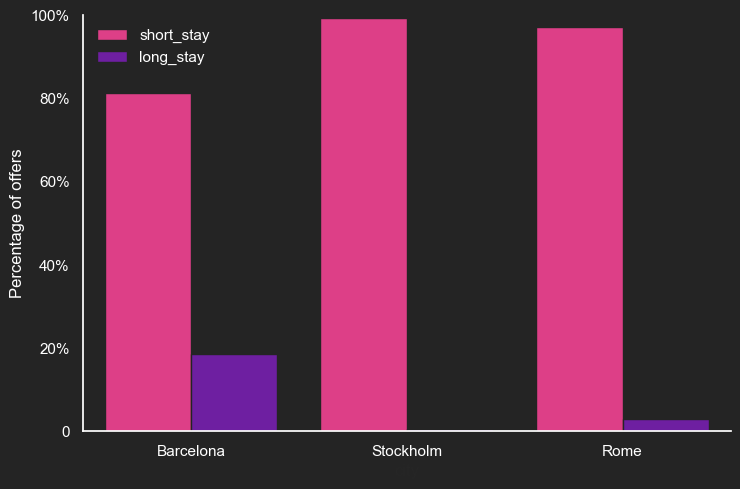

In [61]:
# set the background color to #242424 
sns.set(rc={'axes.facecolor':'#242424', 'figure.facecolor':'#242424'})

# plot the data with a categorical plot
g = sns.catplot(data=new_df3, kind='bar', x='city', y= 'Percent', hue='stay', legend = False, palette = c, edgecolor = "#242424", hue_order=['short_stay', 'long_stay'])

g.ax.set_ylim(0,100)

#titel = plt.title('Percentage of accomodation offered for short and long stays in the different cities')
plt.legend(labelcolor='white', edgecolor = 'none', loc='upper left')  

#legend = plt.legend(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'], loc=2, frameon=False)   
#for text in legend.get_texts():
#    text.set_color("white")

# change axes labels and ticks to white    
#xlabel = plt.xlabel('Location')
ylabel = plt.ylabel('Percentage of offers')

xlabel.set_color("white")
ylabel.set_color("white")

xtick = plt.xticks(rotation=0, color='white')
g.set_xticklabels(['Barcelona','Stockholm','Rome'])
ytick = plt.yticks(color="white")
g.set_yticklabels(['0','20%','40%','60%','80%','100%'])

titel.set_color("white")

      
# Turns off grid on the left Axis.
ax.grid(False)
g.ax.yaxis.grid(False)
sns.despine()

# set figure size in inches   
g.fig.set_size_inches(8,5);

### Figure 4: Average price/accomodation type in the 3 cities

In [62]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43918 entries, 0 to 24923
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              43918 non-null  int64  
 1   host_id         43918 non-null  int64  
 2   room_type       43918 non-null  object 
 3   price           43918 non-null  float64
 4   minimum_nights  43918 non-null  int64  
 5   host_type       43918 non-null  object 
 6   city            43918 non-null  object 
 7   stay            43918 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 3.0+ MB


In [63]:
df_3.groupby('room_type').price.describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,29173.0,214.231924,1650.313379,10.0,84.0,122.0,183.0,100180.0
Hotel room,870.0,213.953757,389.588034,0.0,85.0,124.0,188.0,4600.0
Private room,13512.0,140.409512,1398.808698,8.0,40.0,61.0,100.0,90000.0
Shared room,363.0,56.795079,79.977676,9.0,25.0,36.0,57.0,760.0


In [64]:
df_3.groupby(['city','room_type']).price.mean()


city   room_type      
BCN    Entire home/apt    180.903836
       Hotel room         206.040268
       Private room       116.620520
       Shared room         47.878205
ROM    Entire home/apt    239.018137
       Hotel room         223.069971
       Private room       158.053876
       Shared room         63.137725
STHLM  Entire home/apt    172.878887
       Hotel room          68.964823
       Private room       166.579454
       Shared room         65.090345
Name: price, dtype: float64

In [65]:
# creating a new dataset without the price outliers, with the assumption the an accomodation/ night costs less than 2000 Euro

df_price = df_3.loc[df_3['price'] < 2000]



In [66]:
df_price.city.unique()

array(['BCN', 'STHLM', 'ROM'], dtype=object)

In [67]:
df_price.groupby('room_type').price.describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,29059.0,161.291545,150.179983,10.0,84.0,121.0000,182.0,1999.0
Hotel room,855.0,169.418443,184.463308,0.0,84.0,122.2955,182.0,1449.0
Private room,13449.0,89.427600,107.138103,8.0,40.0,61.0000,100.0,1971.0
Shared room,363.0,56.795079,79.977676,9.0,25.0,36.0000,57.0,760.0


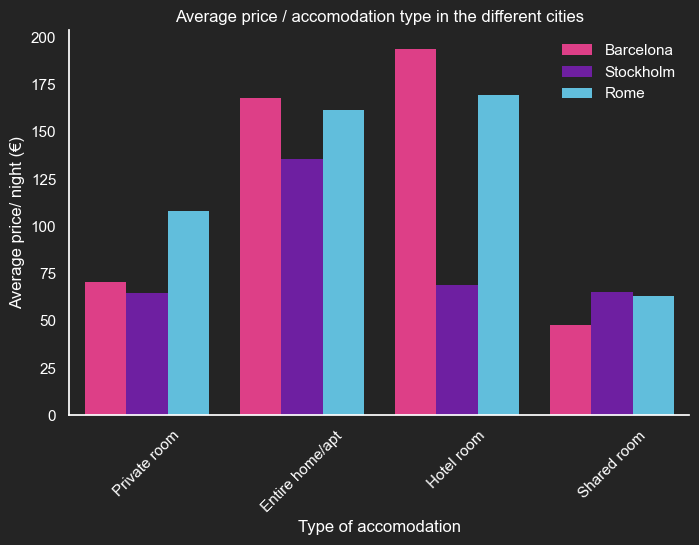

In [68]:
# set the background color to #242424 
sns.set(rc={'axes.facecolor':'#242424', 'figure.facecolor':'#242424'})


# plot the data with a categorical plot
g = sns.barplot(data=df_price, x= 'room_type', y= 'price', hue = 'city', errorbar = None, estimator=np.mean, palette = c, edgecolor = 'none')


legend = plt.legend(['Barcelona', 'Stockholm', 'Rome'], loc=1, frameon=False)   
titel = plt.title('Average price / accomodation type in the different cities')
for text in legend.get_texts():
    text.set_color("white")


# change axes labels and ticks to white    
xlabel = plt.xlabel('Type of accomodation')
ylabel = plt.ylabel('Average price/ night (€)')

xlabel.set_color("white")
ylabel.set_color("white")

xtick = plt.xticks(rotation=45, color='white')
ytick = plt.yticks(color="white")

titel.set_color("white")

# Turns off grids
g.yaxis.grid(False)
sns.despine()

# set figure size in inches   
plt.gcf().set_size_inches(8,5);


In [69]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43918 entries, 0 to 24923
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              43918 non-null  int64  
 1   host_id         43918 non-null  int64  
 2   room_type       43918 non-null  object 
 3   price           43918 non-null  float64
 4   minimum_nights  43918 non-null  int64  
 5   host_type       43918 non-null  object 
 6   city            43918 non-null  object 
 7   stay            43918 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 3.0+ MB
